# IMPORTING THE LIBRARY

In [1]:
import numpy as np
import pandas as pd

# LOADING THE DATASET

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# CONVERTING COLUMNS FROM STRING['SEX','SMOKER','REGION'] TO NUMERICAL VALUES

In [5]:
#operation with sex column
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['sex'].isnull().sum()

0

In [8]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [10]:
#operation with smoker
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [11]:
df['smoker'].isnull().sum()

0

In [12]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [15]:
#operation with region
df['region'].isnull().sum()

0

In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df['region']=df['region'].map({'southwest':1,'southeast':2,'northwest':3, 'northeast':4})

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


# extract dependent variable and target variable 

In [19]:
x=df.iloc[:,0:6]
y=df.iloc[:,-1]

In [20]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# TRAIN/TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# TRAIN THE MODEL ON TRAINING SET

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [24]:
#model=LinearRegression()

In [25]:
#model

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)



GradientBoostingRegressor()

# PREDICTION ON TEST DATA

In [27]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

In [28]:
df1=pd.DataFrame({
    'actual_value':y_test,
    'lr':y_pred1,
    'svm':y_pred2,
    'rf':y_pred3,
    'gr':y_pred4
})

In [29]:
df1

,actual_value,lr,svm,rf,gr
1056,8277.52300,9283.398239,9028.191085,10271.427976,9927.683758
892,10422.91665,10123.719673,9059.057684,15046.745768,12532.536076
1268,1880.48700,3019.587242,8887.571121,1951.019064,2325.619542
622,9182.17000,7576.284793,9029.871940,11592.497050,9349.295957
457,11840.77505,12921.279810,9077.510958,12416.847058,12666.407355
...,...,...,...,...,...
590,11842.44200,12055.259655,9081.122108,11861.638789,11835.759836
568,11552.90400,12770.141084,9034.976053,11091.893907,12608.484500
242,35160.13457,10979.970289,9065.952043,11321.690688,12152.092790
706,44400.40640,37860.143752,9047.955164,46742.391327,48322.542516


# COMPARE PERFORMANCE VISUALLY

In [30]:
import matplotlib.pyplot as plt

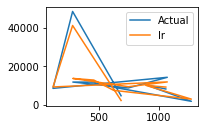

In [31]:
plt.subplot(221)
plt.plot(df1['actual_value'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()
plt.show()

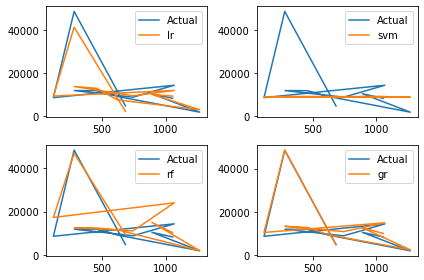

In [32]:
plt.subplot(221)
plt.plot(df1['actual_value'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['actual_value'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['actual_value'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['actual_value'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')


plt.tight_layout() #for removing the overlapping between graphs

plt.legend()


# EVALAUTING THE ALGORITHM

In [33]:
from sklearn import metrics

In [34]:
scores1=metrics.r2_score(y_test,y_pred1)
scores2=metrics.r2_score(y_test,y_pred2)
scores3=metrics.r2_score(y_test,y_pred3)
scores4=metrics.r2_score(y_test,y_pred4)

In [35]:
print(scores1,scores2,scores3,scores4)
print("max value is best for our model")

0.7132039080927531 -0.12313334163485168 0.8120325020023859 0.8384166520967484
max value is best for our model


In [36]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)


In [37]:
print(s1,s2,s3,s4)
print("note : minimun value is the best for our model")

4242.49699353841 8093.8533164684095 2735.9083943890423 2468.7786735614372
note : minimun value is the best for our model


from this we can conclude the model 4 is the best model for our dataset

# PREDICT CHARGES FOR NEW CUSTOMER

In [38]:
data=pd.DataFrame({
    'age':40,
    'sex':1,
    'bmi':40.30,
    'children':4,
    'smoker':1,
    'region':2
},index=[0])

In [39]:
data

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [40]:
new_pred=gr.predict(data)

In [41]:
new_pred

array([43018.94675544])

# SAVE MODEL USING JOBLIB

In [42]:
gr= GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [43]:
import joblib

In [44]:
#for saving our model
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [45]:
model=joblib.load('model_joblib_gr')

In [46]:
model.predict(data)

array([42148.361888])

# CREATING THE GUI

In [47]:
from tkinter import *
import joblib

In [ ]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    model=joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    Label(master,text="Insurance Cost").grid(row=7)
    Label(master,text=result).grid(row=8)
master=Tk()
master.title("Insurance Cost Prediction")
label=Label(master,text="Insurance Cost Prediction",bg='black',fg='white').grid(row=0,columnspan=2)
Label(master,text="Enter Your Age").grid(row=1)
Label(master,text="Male Or Female [1/0]").grid(row=2)
Label(master,text="Enter Your BMI Value").grid(row=3)
Label(master,text="Enter Number Of Children").grid(row=4)
Label(master,text="Smoker yes/no [1/0]").grid(row=5)
Label(master,text="Region [1-4]").grid(row=6)
e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e1.grid(row=1,column=1)  
e2.grid(row=2,column=1) 
e3.grid(row=3,column=1) 
e4.grid(row=4,column=1) 
e5.grid(row=5,column=1) 
e6.grid(row=6,column=1)
Button(master,text='predict',command=show_entry).grid()





mainloop()